# This notebook has been replaced by `radar_chart_improved.ipynb`

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [5]:
df = pd.read_csv("../data/composed/mira_top_10.csv")
# df.head()

/home/luckierdodge/miniconda3/envs/jupyterlab/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (877) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
feature_labels = ['gflops', 'gops', 'ram_store_bpop', 'ram_fetch_bpop', 'av_stdMpiTime', 'RUNTIME_SECONDS', 'WALLTIME_SECONDS'] # Specify the features you want

# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df[feature_labels])
df_normalized = pd.DataFrame(np_scaled, columns = feature_labels)

# Average
df_normalized['zero_execName'] = df['zero_execName']
df_normalized = df_normalized.groupby(['zero_execName']).mean()

In [7]:
angles = np.linspace(0, 2*np.pi, len(feature_labels), endpoint=False) # Set the angle
# Close the plot
angles = np.concatenate((angles, [angles[0]]))

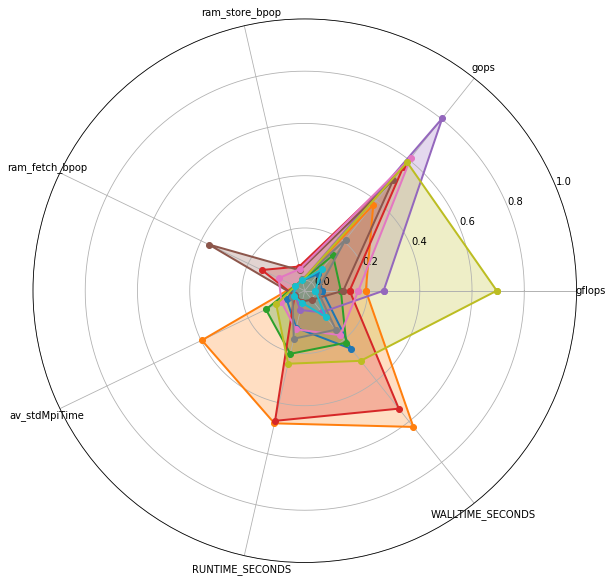

In [8]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, polar=True)   # Set polar axis
for i in range(len(df_normalized.index) - 1):
    row = df_normalized.iloc[i].values
    row = np.concatenate((row, [row[0]]))
    ax.plot(angles, row, 'o-', linewidth=2)  # Draw the plot (or the frame on the radar chart)
    ax.fill(angles, row, alpha=0.25)  #Fulfill the area
ax.set_thetagrids(angles * 180/np.pi, feature_labels)  # Set the label for each axis
ax.set_rmax(1.0)
ax.grid(True)
plt.savefig('../figure/radar_chart_top_10.png')

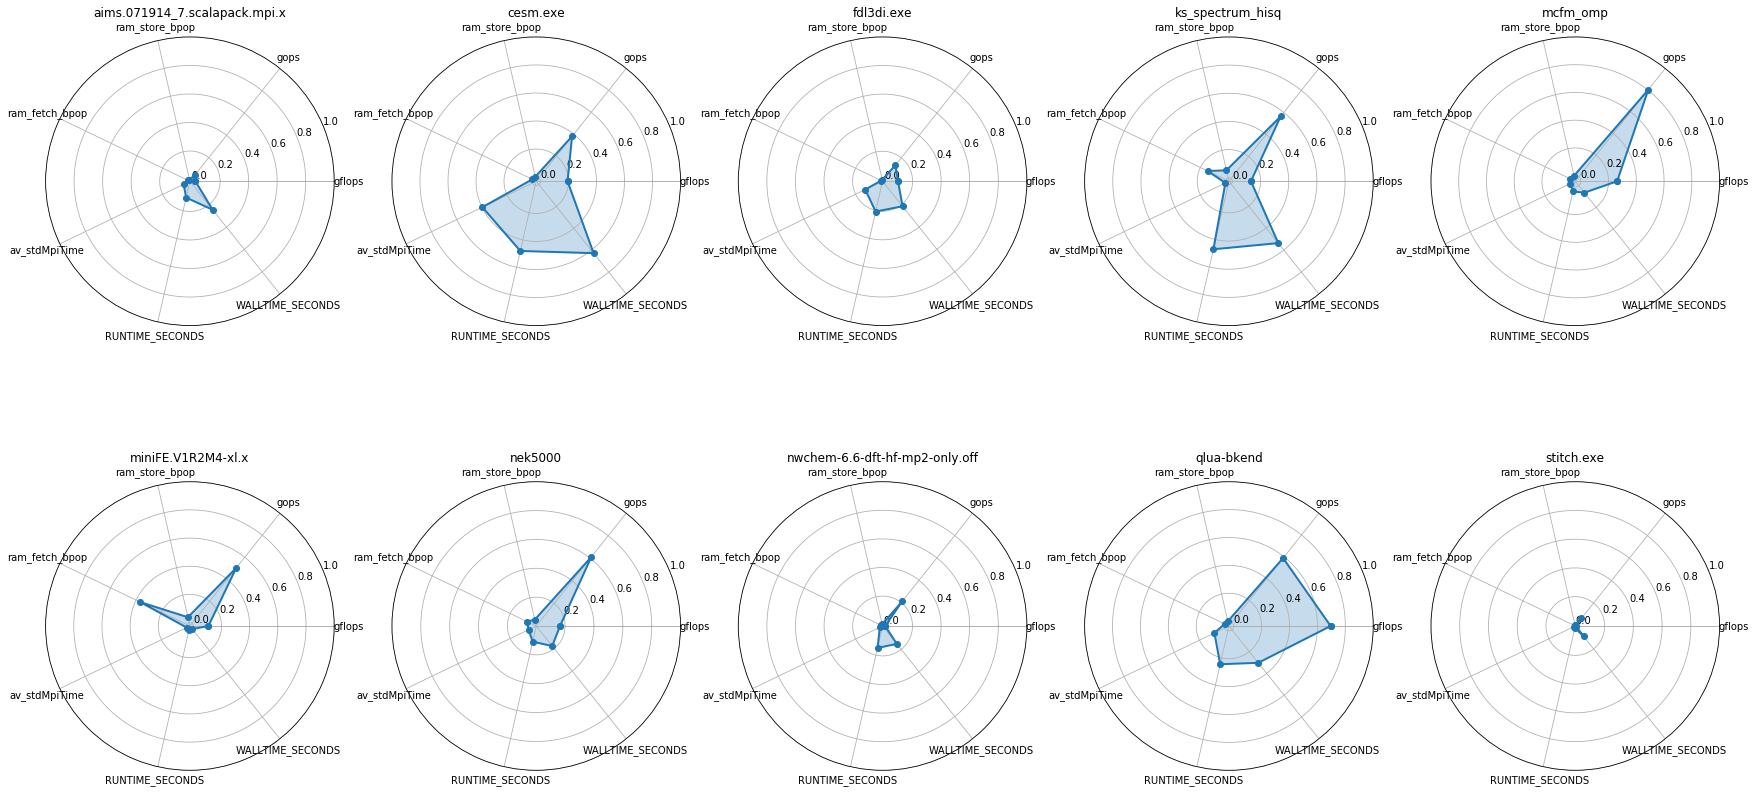

In [9]:
fig=plt.figure(figsize=(30,15))
for i in range(len(df_normalized.index) - 1):
    ax = fig.add_subplot(2 , 5, 1 + i, polar=True)   # Set polar axis
    row = df_normalized.iloc[i].values
    row = np.concatenate((row, [row[0]]))
    ax.plot(angles, row, 'o-', linewidth=2)  # Draw the plot (or the frame on the radar chart)
    ax.fill(angles, row, alpha=0.25)  #Fulfill the area
    ax.set_thetagrids(angles * 180/np.pi, feature_labels)  # Set the label for each axis
    ax.set_rmax(1.0)
    ax.set_title(df_normalized.iloc[i].name)  # Set the executable as the title
    ax.grid(True)
plt.savefig('../figure/radar_chart_top_10_subplots.png')